<a href="https://colab.research.google.com/github/chihhui5/Hands_On_PyTorch-TensorFlow/blob/main/W1_Python_%26_PyTorch_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**線性迴歸
Make model learn(w is weight, and b is bias):**
**$$y_{pred} = w \cdot X + b$$**


In [ ]:
# Step 1.import necessary kit

import torch #OpenSource Machine Learning Framework
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
#Step 2. generate training data

#Set seed to ensure reproducibility
torch.manual_seed(0)

#Set shape(100,1) tensor, including 100 samples [0,1)
#mutiply by 10 to expand to [0,10)
#X is Feature
X=torch.rand(100,1)*10

#Noise(random, unpredictable, non-system distrubtion)
#y is the data we should observe
#randn: the random number is from standard normal distribution
y=2*X+3+torch.randn(100,1)

In [ ]:
#Step 3.initialize parameter(w&b)

#torch.randn(num of samples, num of features, requires_grad)
# requires_grad: ask Pytorch to follow all calculation from this tensor
w= torch.randn(1,1,requires_grad=True)
b= torch.randn(1,requires_grad=True)

In [ ]:
#Step 4. Define Hyperparameter

#set learning rate
lr = 0.01
#the training peroid: how many time it go through the dataset
epochs = 200
#set a null list: to record  each practice result
losses = []

In [ ]:
#Step 5. Manually train the loop

for epoch in range(epochs):
    #forward pass
    y_pred = w*X+b

    #calculate loss(MSE)
    loss = ((y_pred - y)**2).mean()
    #Backpropagation
    loss.backward()

    #Update Parameters
    with torch.no_grad():
        #Reverse direction(-=)
        w-=lr*w.grad
        b-=lr*b.grad

    #Zero Gradients after each update
    w.grad.zero_()
    b.grad.zero_()

    losses.append(loss.item())

    if epoch%20 == 0:
        print (f"Epoch{epoch:3d}:Loss = {loss.item():.4f},w = {w.item():.4f}, b = {b.item():.4f}")

Epoch  0:Loss = 136.1986,w = 1.8050, b = -0.3063
Epoch 20:Loss = 3.5117,w = 2.4154, b = 0.1431
Epoch 40:Loss = 3.0018,w = 2.3677, b = 0.4575
Epoch 60:Loss = 2.5874,w = 2.3247, b = 0.7409
Epoch 80:Loss = 2.2507,w = 2.2859, b = 0.9963
Epoch100:Loss = 1.9772,w = 2.2510, b = 1.2266
Epoch120:Loss = 1.7549,w = 2.2195, b = 1.4342
Epoch140:Loss = 1.5742,w = 2.1911, b = 1.6213
Epoch160:Loss = 1.4274,w = 2.1655, b = 1.7899
Epoch180:Loss = 1.3082,w = 2.1424, b = 1.9420


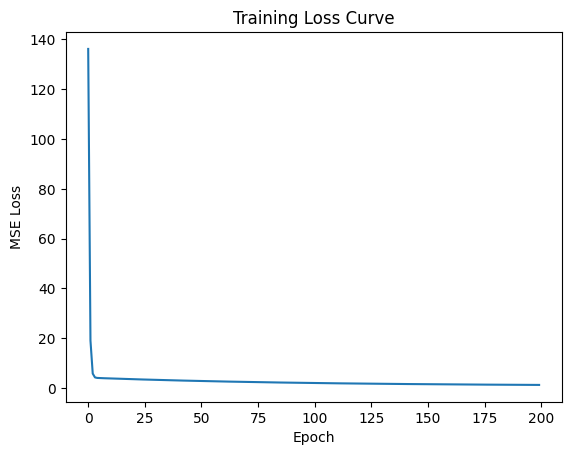

In [ ]:
#Step 6.Visualize the trainging result

plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

In [ ]:
#Step 7. examine the learned parameter

print(f"learned parameters: w = {w.item():.3f}, b = {b.item(): .3f}")

learned parameters: w = 2.123, b =  2.073


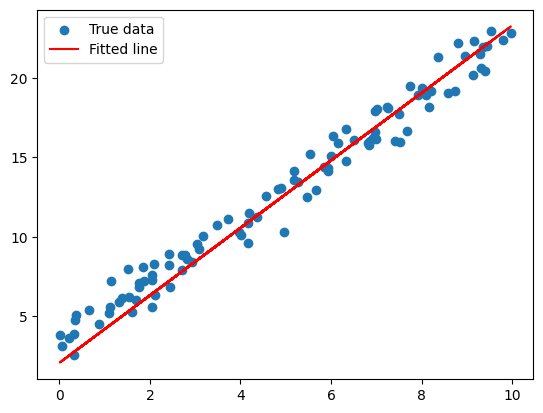

In [ ]:
#Step 8. visualize the predicted result

#demonstrate the original data(will be 100points )
plt.scatter(X.detach().numpy(), y.detach().numpy(), label='True data')
plt.plot(X.detach().numpy(), (w*X + b).detach().numpy(), color='r', label='Fitted line')
plt.legend()
plt.show()